# BUSI/COMP 488  Data Science in the Business World at UNC Chapel Hill
**Instructor:** Jack Snoeyink
<br>
**Notebook Author:** Ryan Thomas
# Census Data Analysis

Baton Rouge is a city in Louisiana that has a population of over 200,000 people. Thanks the the public availabiliy of data on www.data.gov, I was able to download a csv of census data collected on this city from 2000 and 2010. As we wrap up our learning from this class, I wanted to perform analysis on this dataset that used some of the methods that I learned in this class.  If anyone else is interested in analyzing this dataset, it is available through the following link:
<br><br>
https://catalog.data.gov/dataset/census-demographics
<br><br>
It is also available on this github repository. I hope you enjoy!
<br><br>
I wanted to analyze this city's census data from an outside consultant's perspective, where I could give recommendations to the city on how it could potentially improve businesses and other aspects of the city from the census data's findings.

# Imports and Settings

In [1]:
#Imports
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

#Settings
pd.set_option('display.max_columns', None)

## Uploading Data

In [2]:
census_data = pd.read_csv("Census_Demographics.csv")

In [3]:
census_data.head()

,UNIQUE ID,CENSUS YEAR,TRACT,BLOCK GROUP,FIPS ID,TOTAL POPULATION,POPULATION WHITE,POPULATION BLACK,POPULATION ASIAN,POPULATION OTHER,POPULATION AMERICAN INDIAN,POPULATION PACIFIC ISLANDER,POPULATION ONE RACE,POPULATION MULTI RACE,POPULATION 25 OLDER,MEDIAN AGE,MEDIAN HOUSEHOLD INCOME,HIGH SCHOOL MALE,HIGH SCHOOL MORE MALE,COLLEGE 1 YR LESS MALE,COLLEGE 1 YR MORE MALE,ASSOCIATES DEGREE MALE,BACHELORS DEGREE MALE,MASTERS DEGREE MALE,PROFESSIONAL DEGREE MALE,DOCTORAL DEGREE MALE,HIGH SCHOOL FEMALE,HIGH SCHOOL MORE FEMALE,COLLEGE 1 YR LESS FEMALE,COLLEGE 1 YR MORE FEMALE,ASSOCIATES DEGREE FEMALE,BACHELORS DEGREE FEMALE,MASTERS DEGREE FEMALE,PROFESSIONAL DEGREE FEMALE,DOCTORAL DEGREE FEMALE,PERCENT 25 YR OVER HIGH SCHOOL MORE,HOUSING UNITS,OCCUPIED HOUSING UNITS,OWNER OCCUPIED HOUSING,RENTER OCCUPIED HOUSING,PERCENT OWNER OCCUPIED,PERCENT RENTER OCCUPIED,MEDIAN HOUSE VALUE OWNER OCCUPIED,MEDIAN YEAR BUILT,VACANCY RATES
0,2.000220e+15,2000,1.0,1,2.203300e+11,587.0,107,474,0,1,0,NaN,NaN,NaN,347.0,29.5,30109.0,71.0,104,NaN,26.0,NaN,NaN,7.0,NaN,NaN,53.0,122.0,8.0,55.0,6.0,NaN,NaN,NaN,NaN,39.0,242,209.0,108.0,101.0,52.0,48.0,43300.0,1969.0,8.8
1,2.000220e+15,2000,1.0,2,2.203300e+11,1088.0,71,994,4,1,0,NaN,NaN,NaN,473.0,23.3,23472.0,76.0,124,11.0,31.0,6.0,NaN,NaN,NaN,NaN,73.0,166.0,NaN,78.0,NaN,6.0,9.0,NaN,NaN,27.0,382,354.0,143.0,211.0,40.0,60.0,40200.0,1967.0,8.8
2,2.000220e+15,2000,2.0,1,2.203300e+11,1273.0,380,875,6,4,4,NaN,NaN,NaN,699.0,33.2,17552.0,152.0,195,5.0,22.0,NaN,11.0,5.0,NaN,NaN,199.0,313.0,37.0,58.0,NaN,19.0,NaN,NaN,NaN,40.0,584,511.0,274.0,237.0,54.0,46.0,50900.0,1966.0,12.5
3,2.000220e+15,2000,2.0,2,2.203300e+11,1268.0,166,1094,1,0,0,NaN,NaN,NaN,627.0,24.0,17076.0,52.0,118,21.0,37.0,NaN,8.0,NaN,NaN,NaN,108.0,256.0,19.0,82.0,12.0,17.0,18.0,NaN,NaN,29.0,475,463.0,188.0,275.0,41.0,59.0,50000.0,1969.0,21.7
4,2.000220e+15,2000,2.0,3,2.203300e+11,676.0,91,557,17,0,1,NaN,NaN,NaN,468.0,44.4,10854.0,59.0,154,24.0,63.0,8.0,NaN,NaN,NaN,NaN,47.0,95.0,12.0,25.0,NaN,NaN,11.0,NaN,NaN,37.0,375,330.0,97.0,233.0,29.0,71.0,67100.0,1981.0,17.9


In [4]:
print(census_data.shape)

(609, 45)


In [5]:
print(census_data.columns)

Index(['UNIQUE ID', 'CENSUS YEAR', 'TRACT', 'BLOCK GROUP', 'FIPS ID',
       'TOTAL POPULATION', 'POPULATION WHITE', 'POPULATION BLACK',
       'POPULATION ASIAN', 'POPULATION OTHER', 'POPULATION AMERICAN INDIAN',
       'POPULATION PACIFIC ISLANDER', 'POPULATION ONE RACE',
       'POPULATION MULTI RACE', 'POPULATION 25 OLDER', 'MEDIAN AGE',
       'MEDIAN HOUSEHOLD INCOME', 'HIGH SCHOOL MALE', 'HIGH SCHOOL MORE MALE',
       'COLLEGE 1 YR LESS MALE', 'COLLEGE 1 YR MORE MALE',
       'ASSOCIATES DEGREE MALE', 'BACHELORS DEGREE MALE',
       'MASTERS DEGREE MALE', 'PROFESSIONAL DEGREE MALE',
       'DOCTORAL DEGREE MALE', 'HIGH SCHOOL FEMALE', 'HIGH SCHOOL MORE FEMALE',
       'COLLEGE 1 YR LESS FEMALE', 'COLLEGE 1 YR MORE FEMALE',
       'ASSOCIATES DEGREE FEMALE', 'BACHELORS DEGREE FEMALE',
       'MASTERS DEGREE FEMALE', 'PROFESSIONAL DEGREE FEMALE',
       'DOCTORAL DEGREE FEMALE', 'PERCENT 25 YR OVER HIGH SCHOOL MORE',
       'HOUSING UNITS', 'OCCUPIED HOUSING UNITS', 'OWNER OCCUPI

# Data Wrangling
My major goal of this analysis was to analyze the 609 different areas mentioned in this city and consider ways that the city could be improved by identifying inequality and potentially classify different areas of the city the have different needs. Before doing this, I would need to wrangle the data in order to specifically extract some of the variables I was interested in.

In [6]:
# Turning Population Measures into Percentages
census_data["PERC WHITE"] = census_data["POPULATION WHITE"]/census_data["TOTAL POPULATION"]*100
census_data["PERC BLACK"] = census_data["POPULATION BLACK"]/census_data["TOTAL POPULATION"]*100
census_data["PERC ASIAN"] = census_data["POPULATION ASIAN"]/census_data["TOTAL POPULATION"]*100
census_data["PERC OTHER"] = census_data["POPULATION OTHER"]/census_data["TOTAL POPULATION"]*100
census_data["PERC AMERICAN INDIAN"] = census_data["POPULATION AMERICAN INDIAN"]/census_data["TOTAL POPULATION"]*100
census_data["PERC PACIFIC ISLANDER"] = census_data["POPULATION PACIFIC ISLANDER"]/census_data["TOTAL POPULATION"]*100
census_data["PERC ONE RACE"] = census_data["POPULATION ONE RACE"]/census_data["TOTAL POPULATION"]*100
census_data["PERC MULTI RACE"] = census_data["POPULATION MULTI RACE"]/census_data["TOTAL POPULATION"]*100
census_data["PERC HIGH SCHOOL MALE"] = census_data["HIGH SCHOOL MALE"]/census_data["TOTAL POPULATION"]*100
census_data["PERC HIGH SCHOOL MORE MALE"] = census_data["HIGH SCHOOL MORE MALE"]/census_data["TOTAL POPULATION"]*100
census_data["PERC COLLEGE 1 YR LESS MALE"] = census_data["COLLEGE 1 YR LESS MALE"]/census_data["TOTAL POPULATION"]*100
census_data["PERC COLLEGE 1 YR MORE MALE"] = census_data["COLLEGE 1 YR MORE MALE"]/census_data["TOTAL POPULATION"]*100
census_data["PERC ASSOCIATES DEGREE MALE"] = census_data["ASSOCIATES DEGREE MALE"]/census_data["TOTAL POPULATION"]*100
census_data["PERC BACHELORS DEGREE MALE"] = census_data["BACHELORS DEGREE MALE"]/census_data["TOTAL POPULATION"]*100
census_data["PERC MASTERS DEGREE MALE"] = census_data["MASTERS DEGREE MALE"]/census_data["TOTAL POPULATION"]*100
census_data["PERC POPULATION 25 OLDER"] = census_data["POPULATION 25 OLDER"]/census_data["TOTAL POPULATION"]*100
census_data["PERC PROFESSIONAL DEGREE MALE"] = census_data["PROFESSIONAL DEGREE MALE"]/census_data["TOTAL POPULATION"]*100
census_data["PERC DOCTORAL DEGREE MALE"] = census_data["DOCTORAL DEGREE MALE"]/census_data["TOTAL POPULATION"]*100
census_data["PERC HIGH SCHOOL FEMALE"] = census_data["HIGH SCHOOL FEMALE"]/census_data["TOTAL POPULATION"]*100
census_data["PERC HIGH SCHOOL MORE FEMALE"] = census_data["HIGH SCHOOL MORE FEMALE"]/census_data["TOTAL POPULATION"]*100
census_data["PERC COLLEGE 1 YR LESS FEMALE"] = census_data["COLLEGE 1 YR LESS FEMALE"]/census_data["TOTAL POPULATION"]*100
census_data["PERC ASSOCIATES DEGREE FEMALE"] = census_data["ASSOCIATES DEGREE FEMALE"]/census_data["TOTAL POPULATION"]*100
census_data["PERC COLLEGE 1 YR MORE FEMALE"] = census_data["COLLEGE 1 YR MORE FEMALE"]/census_data["TOTAL POPULATION"]*100
census_data["PERC BACHELORS DEGREE FEMALE"] = census_data["BACHELORS DEGREE FEMALE"]/census_data["TOTAL POPULATION"]*100
census_data["PERC MASTERS DEGREE FEMALE"] = census_data["MASTERS DEGREE FEMALE"]/census_data["TOTAL POPULATION"]*100
census_data["PERC PROFESSIONAL DEGREE FEMALE"] = census_data["PROFESSIONAL DEGREE FEMALE"]/census_data["TOTAL POPULATION"]*100
census_data["PERC DOCTORAL DEGREE FEMALE"] = census_data["DOCTORAL DEGREE FEMALE"]/census_data["TOTAL POPULATION"]*100
census_data["PERC OTHER"] = census_data["POPULATION OTHER"]/census_data["TOTAL POPULATION"]*100
census_data["PERC OTHER"] = census_data["POPULATION OTHER"]/census_data["TOTAL POPULATION"]*100
census_data["PERC OTHER"] = census_data["POPULATION OTHER"]/census_data["TOTAL POPULATION"]*100

#Dropping previous values
census_data = census_data.drop(["POPULATION WHITE","POPULATION BLACK","POPULATION ASIAN","POPULATION OTHER","POPULATION AMERICAN INDIAN",
                                "POPULATION PACIFIC ISLANDER", "POPULATION ONE RACE", "POPULATION MULTI RACE","POPULATION 25 OLDER",
                                "HIGH SCHOOL MALE", "PROFESSIONAL DEGREE MALE", "HIGH SCHOOL FEMALE", "DOCTORAL DEGREE MALE",
                                'COLLEGE 1 YR LESS FEMALE', 'COLLEGE 1 YR MORE FEMALE', 'ASSOCIATES DEGREE FEMALE', 'COLLEGE 1 YR MORE FEMALE',
                                'BACHELORS DEGREE FEMALE', 'MASTERS DEGREE FEMALE','DOCTORAL DEGREE FEMALE',
                               "MASTERS DEGREE MALE"],axis =1)

# Dimension Reduction
This dataset had a lot of variables, but where is the variance between different areas in Batton Rouge the greatest? What features are the most important when analyzing this city?  These were the questions that I wanted to look into as I did dimension reduction.

In [7]:
# We now need to make sure that our features are all on the same scale
from sklearn.preprocessing import minmax_scale
# mix-max scale the data between 0 and 1
data_scaled = minmax_scale(census_data)
data_scaled = pd.DataFrame(data_scaled)
data_scaled.columns = census_data.columns

#Setting NaN values as the averages across all columns for the scaled data
means = data_scaled.mean().to_dict()
data_scaled = data_scaled.fillna(means)

#removing variables that don't give insite
data_scaled = data_scaled.drop(['UNIQUE ID', 'CENSUS YEAR', 'TRACT', 'FIPS ID', 'BLOCK GROUP'], axis=1)

#Displaying the final result
display(data_scaled.head())

,TOTAL POPULATION,MEDIAN AGE,MEDIAN HOUSEHOLD INCOME,HIGH SCHOOL MORE MALE,COLLEGE 1 YR LESS MALE,COLLEGE 1 YR MORE MALE,ASSOCIATES DEGREE MALE,BACHELORS DEGREE MALE,HIGH SCHOOL MORE FEMALE,PROFESSIONAL DEGREE FEMALE,PERCENT 25 YR OVER HIGH SCHOOL MORE,HOUSING UNITS,OCCUPIED HOUSING UNITS,OWNER OCCUPIED HOUSING,RENTER OCCUPIED HOUSING,PERCENT OWNER OCCUPIED,PERCENT RENTER OCCUPIED,MEDIAN HOUSE VALUE OWNER OCCUPIED,MEDIAN YEAR BUILT,VACANCY RATES,PERC WHITE,PERC BLACK,PERC ASIAN,PERC OTHER,PERC AMERICAN INDIAN,PERC PACIFIC ISLANDER,PERC ONE RACE,PERC MULTI RACE,PERC HIGH SCHOOL MALE,PERC HIGH SCHOOL MORE MALE,PERC COLLEGE 1 YR LESS MALE,PERC COLLEGE 1 YR MORE MALE,PERC ASSOCIATES DEGREE MALE,PERC BACHELORS DEGREE MALE,PERC MASTERS DEGREE MALE,PERC POPULATION 25 OLDER,PERC PROFESSIONAL DEGREE MALE,PERC DOCTORAL DEGREE MALE,PERC HIGH SCHOOL FEMALE,PERC HIGH SCHOOL MORE FEMALE,PERC COLLEGE 1 YR LESS FEMALE,PERC ASSOCIATES DEGREE FEMALE,PERC COLLEGE 1 YR MORE FEMALE,PERC BACHELORS DEGREE FEMALE,PERC MASTERS DEGREE FEMALE,PERC PROFESSIONAL DEGREE FEMALE,PERC DOCTORAL DEGREE FEMALE
0,0.118634,0.515734,0.119710,0.069472,0.164306,0.079511,0.158311,0.131443,0.074755,0.089584,0.39,0.124871,0.119702,0.022449,0.034997,0.52,0.48,0.064733,0.982535,0.117333,0.118432,0.810080,0.000000,0.009300,0.000000,0.021676,0.706353,0.293647,0.413222,0.312160,0.150314,0.250307,0.134487,0.240430,0.062054,0.515611,0.068353,0.071945,0.273409,0.334214,0.115967,0.082958,0.405027,0.220329,0.191060,0.077515,0.059688
1,0.219887,0.407343,0.089745,0.082832,0.077465,0.094801,0.057143,0.131443,0.101716,0.089584,0.27,0.197110,0.202749,0.029724,0.073112,0.40,0.60,0.060099,0.981537,0.117333,0.042399,0.916526,0.007048,0.005018,0.000000,0.021676,0.706353,0.293647,0.238643,0.200805,0.091994,0.161017,0.065074,0.240430,0.108213,0.366954,0.068353,0.071945,0.203174,0.241604,0.183376,0.132515,0.309902,0.019261,0.052999,0.077515,0.059688
2,0.257276,0.580420,0.063018,0.130261,0.035211,0.067278,0.158311,0.016082,0.191789,0.089584,0.40,0.301342,0.292669,0.056953,0.082121,0.54,0.46,0.076095,0.981038,0.166667,0.193946,0.689552,0.009036,0.017154,0.170027,0.021676,0.706353,0.293647,0.407923,0.269891,0.035738,0.097663,0.134487,0.035218,0.020439,0.475648,0.068353,0.071945,0.473369,0.397962,0.247318,0.132515,0.196951,0.052128,0.191060,0.077515,0.059688
3,0.256265,0.419580,0.060869,0.078824,0.147887,0.113150,0.158311,0.011696,0.156863,0.089584,0.29,0.245098,0.265178,0.039077,0.095288,0.41,0.59,0.074750,0.982535,0.289333,0.085058,0.865537,0.001512,0.000000,0.000000,0.021676,0.706353,0.293647,0.140103,0.163963,0.150693,0.164900,0.134487,0.025714,0.108213,0.423734,0.068353,0.071945,0.257917,0.324254,0.127502,0.076808,0.279546,0.046825,0.090951,0.077515,0.059688
4,0.136621,0.776224,0.032778,0.102872,0.169014,0.192661,0.076190,0.131443,0.058211,0.089584,0.37,0.193498,0.189003,0.020162,0.080735,0.29,0.71,0.100314,0.988523,0.238667,0.087462,0.826601,0.048210,0.000000,0.080046,0.021676,0.706353,0.293647,0.298173,0.401381,0.323042,0.526662,0.139645,0.240430,0.108213,0.611769,0.068353,0.071945,0.210536,0.221425,0.151049,0.132515,0.159865,0.220329,0.104256,0.077515,0.059688


In [8]:
# instantiate the model
pca = PCA()

# fit the model
census_pca = pca.fit_transform(data_scaled)

# put the output in a dataframe
census_pca = pd.DataFrame(census_pca)

# Let's see what the 6 principle components (PCs) look like
census_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46
0,-0.519513,-0.177425,-0.094128,0.148436,0.120638,0.080567,0.050791,0.024026,0.004426,0.049587,-0.124779,-0.038560,0.174152,0.012994,0.044146,-0.011833,-0.135993,0.007727,0.011080,0.108120,-0.041924,0.053705,-0.051360,-0.012949,0.020242,-0.015671,-0.014081,0.001206,0.016506,-0.029960,-0.021847,0.017627,0.017105,-0.022612,-0.031470,0.053484,-0.004604,0.007252,-0.061903,0.028677,-0.022275,-0.015238,-0.010321,-0.040104,-0.003511,0.025687,-1.269950e-16
1,-0.784186,0.069037,-0.070130,0.142454,-0.099600,-0.040689,0.098848,-0.026276,-0.134521,0.041464,-0.008518,0.077399,0.172669,0.029427,0.034415,-0.009856,-0.184068,-0.037272,-0.078199,0.064394,0.006281,0.028875,0.005143,-0.053017,0.038917,0.038380,-0.022252,-0.022248,0.010192,-0.011516,-0.014618,0.020617,-0.016200,-0.004784,-0.006244,-0.018922,0.001479,-0.007126,-0.023680,0.002267,0.027785,0.009871,-0.012721,0.010038,-0.005321,0.006427,-1.887102e-16
2,-0.483472,-0.060419,0.004112,-0.110039,-0.093408,0.166142,0.002208,-0.141037,-0.076783,0.179176,0.009229,-0.115861,-0.110981,0.007505,0.018266,0.006647,0.060481,-0.014241,-0.044763,-0.065363,-0.065521,-0.007876,0.004270,0.025398,0.064945,-0.027916,0.013158,-0.008539,-0.021353,-0.034683,0.003560,0.003875,0.008435,0.010310,-0.008072,-0.029874,0.003060,0.031958,0.019235,-0.019690,-0.029054,-0.008867,0.007251,-0.011036,0.002159,0.003036,1.813678e-16
3,-0.746456,0.119285,-0.005819,0.088006,-0.088662,0.082025,0.081180,0.060700,-0.152815,-0.030604,-0.150815,0.102198,-0.008730,-0.002786,0.025959,-0.013936,0.041009,-0.071446,-0.011040,-0.011810,0.039456,0.045692,0.000058,-0.060556,0.040340,0.042278,-0.003200,-0.013015,0.037543,-0.006039,0.019569,-0.010376,-0.027781,0.001530,-0.010299,-0.004092,0.000906,-0.005474,0.016784,-0.018681,0.041441,0.009320,-0.014939,0.020669,-0.025636,0.002119,-9.453690e-17
4,-0.563886,0.098142,-0.107023,0.118288,0.354889,-0.071554,0.193683,0.191976,-0.012184,-0.052420,0.107700,-0.089002,0.178773,0.119114,-0.045672,-0.034011,0.085575,0.019152,0.047072,0.138241,0.084111,-0.170702,-0.123884,-0.072352,-0.032397,-0.023947,0.072557,-0.065181,-0.036916,-0.025281,-0.000723,0.002194,0.084555,0.064860,-0.007011,0.002952,0.057129,-0.012548,0.002934,-0.009327,0.014456,-0.009923,0.019235,0.008440,-0.009847,0.020523,-3.157016e-16


In [9]:
explained_variance = pca.explained_variance_ratio_

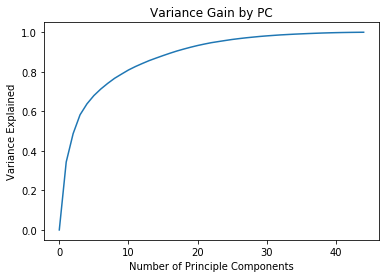

In [10]:
#Calculating cumulative variance
cumvar=np.cumsum(explained_variance)
cumvar = np.insert(cumvar, 0,0)

#plotting cumulative variance across PC values
plt.plot(range(0,45),cumvar[0:45])
plt.title('Variance Gain by PC')
plt.xlabel('Number of Principle Components')
plt.ylabel('Variance Explained') 
plt.show()

In [11]:
for index in range(1,11):
    print('Principal Component:', index, 'Variance Accounted For so Far: ', cumvar[index])

Principal Component: 1 Variance Accounted For so Far:  0.3433200643957787
Principal Component: 2 Variance Accounted For so Far:  0.4867985528924779
Principal Component: 3 Variance Accounted For so Far:  0.5821370560675172
Principal Component: 4 Variance Accounted For so Far:  0.6374818290821459
Principal Component: 5 Variance Accounted For so Far:  0.6793718013794405
Principal Component: 6 Variance Accounted For so Far:  0.7125236688903043
Principal Component: 7 Variance Accounted For so Far:  0.7411080834471196
Principal Component: 8 Variance Accounted For so Far:  0.7669076792499996
Principal Component: 9 Variance Accounted For so Far:  0.7880952766271768
Principal Component: 10 Variance Accounted For so Far:  0.8087771596385186


In [12]:
import pandas as pd
import pylab as pl
from sklearn import datasets
from sklearn.decomposition import PCA

# Dump components relations with features:
weights_df = pd.DataFrame(pca.components_[0:4],columns=data_scaled.columns,index = ['PC-1','PC-2', 'PC-3', 'PC-4'])
display(weights_df)

,TOTAL POPULATION,MEDIAN AGE,MEDIAN HOUSEHOLD INCOME,HIGH SCHOOL MORE MALE,COLLEGE 1 YR LESS MALE,COLLEGE 1 YR MORE MALE,ASSOCIATES DEGREE MALE,BACHELORS DEGREE MALE,HIGH SCHOOL MORE FEMALE,PROFESSIONAL DEGREE FEMALE,PERCENT 25 YR OVER HIGH SCHOOL MORE,HOUSING UNITS,OCCUPIED HOUSING UNITS,OWNER OCCUPIED HOUSING,RENTER OCCUPIED HOUSING,PERCENT OWNER OCCUPIED,PERCENT RENTER OCCUPIED,MEDIAN HOUSE VALUE OWNER OCCUPIED,MEDIAN YEAR BUILT,VACANCY RATES,PERC WHITE,PERC BLACK,PERC ASIAN,PERC OTHER,PERC AMERICAN INDIAN,PERC PACIFIC ISLANDER,PERC ONE RACE,PERC MULTI RACE,PERC HIGH SCHOOL MALE,PERC HIGH SCHOOL MORE MALE,PERC COLLEGE 1 YR LESS MALE,PERC COLLEGE 1 YR MORE MALE,PERC ASSOCIATES DEGREE MALE,PERC BACHELORS DEGREE MALE,PERC MASTERS DEGREE MALE,PERC POPULATION 25 OLDER,PERC PROFESSIONAL DEGREE MALE,PERC DOCTORAL DEGREE MALE,PERC HIGH SCHOOL FEMALE,PERC HIGH SCHOOL MORE FEMALE,PERC COLLEGE 1 YR LESS FEMALE,PERC ASSOCIATES DEGREE FEMALE,PERC COLLEGE 1 YR MORE FEMALE,PERC BACHELORS DEGREE FEMALE,PERC MASTERS DEGREE FEMALE,PERC PROFESSIONAL DEGREE FEMALE,PERC DOCTORAL DEGREE FEMALE
PC-1,0.084462,0.107266,0.151779,0.171695,0.085662,0.138851,0.054462,0.155399,0.152430,0.083845,0.237204,0.107239,0.128054,0.102819,-0.044427,0.233810,-0.236045,0.132200,0.005176,-0.041005,0.333903,-0.526504,0.024302,-0.006709,0.015963,0.002777,-0.007475,0.007475,-0.065585,0.215396,0.033011,0.102007,0.015736,0.230373,0.079636,0.093161,0.064792,0.051483,-0.049345,0.176155,0.017385,0.023559,0.033141,0.192697,0.116802,0.063415,0.035540
PC-2,0.201925,-0.155536,-0.071209,0.118113,0.028716,0.109597,0.100653,0.116896,0.096025,0.047909,0.049783,0.270889,0.251078,-0.013907,0.272136,-0.493943,0.499852,0.040967,0.005389,0.075627,0.067973,-0.163368,0.062532,0.075576,0.045032,0.010318,-0.106905,0.106905,-0.150628,-0.026486,-0.070130,-0.048637,0.017574,0.044667,0.030130,-0.109199,-0.014774,0.008466,-0.158230,-0.083115,-0.063068,-0.033691,-0.055661,0.017161,-0.026833,0.007351,0.014463
PC-3,0.271496,-0.005719,0.012425,0.208209,0.268317,0.322574,0.217782,0.116682,0.228067,-0.006184,-0.101248,0.270106,0.292933,0.206430,0.064297,0.170286,-0.171862,-0.046608,0.012425,-0.082170,-0.203855,0.345363,-0.042583,-0.002803,0.002390,-0.007094,0.044635,-0.044635,0.167741,-0.041377,0.089586,0.109755,0.057067,-0.109039,-0.105380,0.028866,-0.087760,-0.069233,0.136576,-0.010578,0.034072,0.024788,0.100515,-0.064217,-0.081304,-0.083663,-0.075216
PC-4,-0.027212,0.040423,0.073002,0.050744,-0.097711,-0.065380,0.032636,0.141010,0.063062,0.128217,0.160638,0.019882,0.013486,0.050325,-0.001006,-0.001894,0.015175,0.104426,0.007641,-0.005152,-0.291356,0.467617,0.001351,-0.077570,-0.185470,-0.003535,0.120579,-0.120579,-0.267935,0.086308,-0.089402,-0.081544,0.036554,0.241776,0.142044,0.055313,0.115966,0.125938,-0.274161,0.126263,-0.169021,-0.039777,0.047403,0.249279,0.330849,0.123719,0.068589


In [13]:
#Analysis of the principal components
for row, value in weights_df.iterrows():
    value = value.apply(lambda x: abs(x))
    print(row)
    print(value.nlargest(5))
    print()

PC-1
PERC BLACK                             0.526504
PERC WHITE                             0.333903
PERCENT 25 YR OVER HIGH SCHOOL MORE    0.237204
PERCENT RENTER OCCUPIED                0.236045
PERCENT OWNER OCCUPIED                 0.233810
Name: PC-1, dtype: float64

PC-2
PERCENT RENTER OCCUPIED    0.499852
PERCENT OWNER OCCUPIED     0.493943
RENTER OCCUPIED HOUSING    0.272136
HOUSING UNITS              0.270889
OCCUPIED HOUSING UNITS     0.251078
Name: PC-2, dtype: float64

PC-3
PERC BLACK                0.345363
COLLEGE 1 YR MORE MALE    0.322574
OCCUPIED HOUSING UNITS    0.292933
TOTAL POPULATION          0.271496
HOUSING UNITS             0.270106
Name: PC-3, dtype: float64

PC-4
PERC BLACK                    0.467617
PERC MASTERS DEGREE FEMALE    0.330849
PERC WHITE                    0.291356
PERC HIGH SCHOOL FEMALE       0.274161
PERC HIGH SCHOOL MALE         0.267935
Name: PC-4, dtype: float64



## Analysis of PCA on the Census Data
There appears to be 3 characteristics about areas in the city that have the most variance in our dataset.  These characteristics include: race, housing, and education.  If I were to consult this city based on these findings, I would show them that it appears that their city is segregated by these 3 variables, and that efforts to equalize these variables across different areas in the city might help to reduce inequality.

# Income Analysis
I decided to reconfigure my data to include 3 different indexes on racial, educational, and housing segregation.  I then decided to see if different income groups could be clustered across these different indexes.
### Method Explained
For this, I had to do a little outside-of-class research on the subject in order to understand how segregation might be measured in these areas.  The indeces are based on the difference of the percentages of certain groups across the entire city and the proportion of that group inside a sub-area of the city.  For example, it could measure the difference of college graduates across the city vs. the college graduates in a sub-area of the city to measure how segregated college education is in a particular area.  My features ar engineered in the cell below

In [14]:
ori_data = pd.read_csv("Census_Demographics.csv")

In [15]:
ori_data.columns

Index(['UNIQUE ID', 'CENSUS YEAR', 'TRACT', 'BLOCK GROUP', 'FIPS ID',
       'TOTAL POPULATION', 'POPULATION WHITE', 'POPULATION BLACK',
       'POPULATION ASIAN', 'POPULATION OTHER', 'POPULATION AMERICAN INDIAN',
       'POPULATION PACIFIC ISLANDER', 'POPULATION ONE RACE',
       'POPULATION MULTI RACE', 'POPULATION 25 OLDER', 'MEDIAN AGE',
       'MEDIAN HOUSEHOLD INCOME', 'HIGH SCHOOL MALE', 'HIGH SCHOOL MORE MALE',
       'COLLEGE 1 YR LESS MALE', 'COLLEGE 1 YR MORE MALE',
       'ASSOCIATES DEGREE MALE', 'BACHELORS DEGREE MALE',
       'MASTERS DEGREE MALE', 'PROFESSIONAL DEGREE MALE',
       'DOCTORAL DEGREE MALE', 'HIGH SCHOOL FEMALE', 'HIGH SCHOOL MORE FEMALE',
       'COLLEGE 1 YR LESS FEMALE', 'COLLEGE 1 YR MORE FEMALE',
       'ASSOCIATES DEGREE FEMALE', 'BACHELORS DEGREE FEMALE',
       'MASTERS DEGREE FEMALE', 'PROFESSIONAL DEGREE FEMALE',
       'DOCTORAL DEGREE FEMALE', 'PERCENT 25 YR OVER HIGH SCHOOL MORE',
       'HOUSING UNITS', 'OCCUPIED HOUSING UNITS', 'OWNER OCCUPI

In [16]:
#Data Averaged by area
averaged_data = ori_data.groupby(['BLOCK GROUP', 'TRACT']).mean()

In [17]:
#I had to assume that na values were 0 in order to best prevent incorrect measures in my indexes
data_0na = averaged_data.fillna(0)

#total population
total_population = sum(data_0na['TOTAL POPULATION'])

#Education Totals
total_bach = sum(data_0na['BACHELORS DEGREE MALE']) + sum(data_0na['BACHELORS DEGREE FEMALE'])

#Racial Total
total_white = sum(data_0na['POPULATION WHITE'])
total_black = sum(data_0na['POPULATION BLACK'])
total_other = sum(data_0na['POPULATION OTHER'])

#Housing Total
total_own = sum(data_0na['OWNER OCCUPIED HOUSING'])
total_rent = sum(data_0na['RENTER OCCUPIED HOUSING'])

In [18]:
#Race Segregation Index
rs_index = abs(total_white/total_population*100 - census_data['PERC WHITE']) + abs(total_black/total_population*100-census_data['PERC BLACK']) + abs(total_other/total_population*100-census_data['PERC OTHER'])


#Housing Segregation Index
hs_index = abs(total_own/total_population*100 - census_data['PERCENT OWNER OCCUPIED']) + abs(total_rent/total_population*100 - census_data['PERCENT RENTER OCCUPIED'])


#Educational Segregation Index
es_index = abs(total_bach/total_population*100 - (census_data['PERC BACHELORS DEGREE FEMALE'] + census_data['PERC BACHELORS DEGREE MALE']))

In [19]:
index_df = {'rs_index' : rs_index,
               'hs_index' : hs_index,
               'es_index' : es_index,
               'Income' : census_data['MEDIAN HOUSEHOLD INCOME']}
index_df = pd.DataFrame(index_df)
index_df.head()

,rs_index,hs_index,es_index,Income
0,75.434133,31.533986,NaN,30109.0
1,97.825843,35.152122,NaN,23472.0
2,51.653502,31.533986,10.320049,17552.0
3,86.269316,33.152122,10.705078,17076.0
4,82.018107,57.152122,NaN,10854.0


In [20]:
index_df.Income = index_df.Income.apply(lambda x: 'Below Avg' if x < 38790 else "Above Avg")

In [21]:
index_df.Income.value_counts()

Above Avg    321
Below Avg    288
Name: Income, dtype: int64

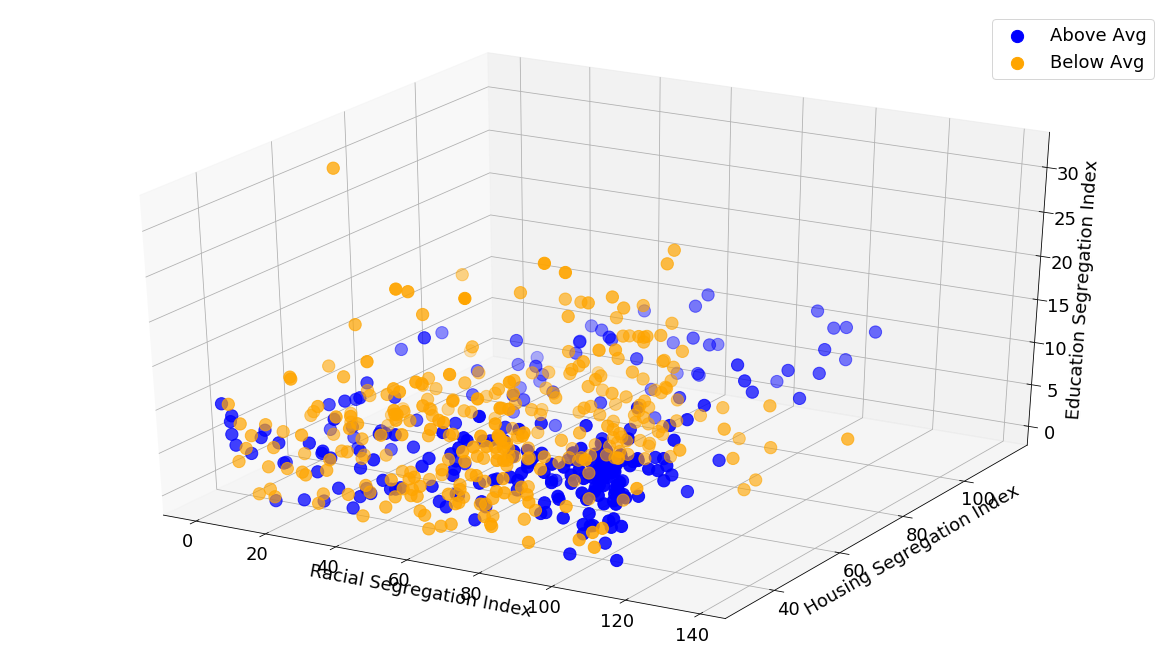

In [22]:
from mpl_toolkits.mplot3d import Axes3D

above = index_df[index_df.Income == "Below Avg"]
below = index_df[index_df.Income == "Above Avg"]


# Visualize the Output
plt.rcParams['font.size'] = 18  # makes lable size bigger
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()

ax = Axes3D(fig)

ax.scatter(above['rs_index'], above['hs_index'], above['es_index'], c="blue", s = 150, label='Above Avg')
ax.scatter(below['rs_index'], below['hs_index'], below['es_index'], c="orange", s=150, label='Below Avg')
ax.set_xlabel('Racial Segregation Index')
ax.set_ylabel('Housing Segregation Index')
ax.set_zlabel('Education Segregation Index')

ax.legend()

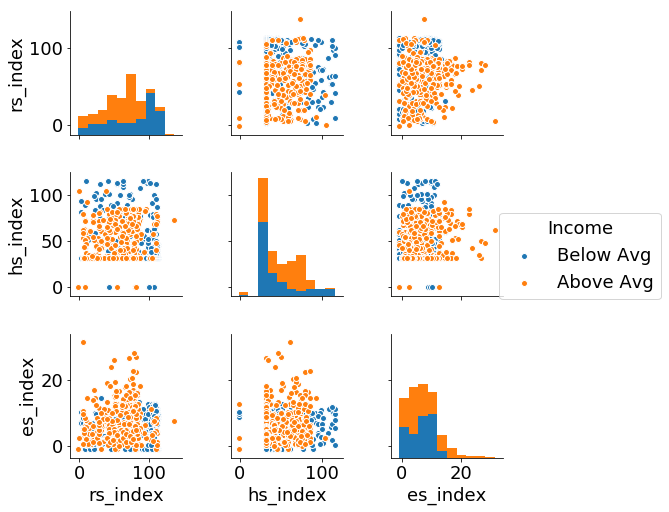

In [23]:
#Creating data that is missing is filled with a negative value so that it stands out, because all of the indexes are positive
na_filled = index_df.fillna(-1)

#Creating Pairs Plot
sns.pairplot(na_filled, hue='Income')

# Final Analysis 
My PCA analysis was able to guide me in a direction where I was able to identify the variables that caused the most variance in my dataset, and create separate indeces that helped me see how this variance might lead to income inequality in areas of Baton Rouge. There may be room for improvement in using PCA and in the indices that I formed, but clearly income averages showed a split based on many of the segregation measures that I engineered. I really enjoyed making this notebook because I learned a lot about how things like segregation can be measured mathematically, and I think that I provided measures that could be applicable to tackling some of the economic issues that Baton Rouge faces. If anyone in the class comes across this notebook, I want to challenge them to continue an analysis on this dataset with some of the other methods that we have learned in class. One step that I would consider taking is a cluster analysis of the different areas in the dataset. Thank you all who took the time to read this and good luck on finals!
<br><br>
Ryan Thomas